In [1]:
from backtesting.test import GOOG

GOOG.tail()


C:\Users\86189\anaconda3\lib\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

,Open,High,Low,Close,Volume
2013-02-25,802.3,808.41,790.49,790.77,2303900
2013-02-26,795.0,795.95,784.40,790.13,2202500
2013-02-27,794.8,804.75,791.11,799.78,2026100
2013-02-28,801.1,806.99,801.03,801.20,2265800
2013-03-01,797.8,807.14,796.15,806.19,2175400


In [2]:
pip install backtesting

Note: you may need to restart the kernel to use updated packages.


In [3]:
from backtesting.test import GOOG

GOOG.tail()

,Open,High,Low,Close,Volume
2013-02-25,802.3,808.41,790.49,790.77,2303900
2013-02-26,795.0,795.95,784.40,790.13,2202500
2013-02-27,794.8,804.75,791.11,799.78,2026100
2013-02-28,801.1,806.99,801.03,801.20,2265800
2013-03-01,797.8,807.14,796.15,806.19,2175400


In [4]:
pip install ta-lib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ta-lib

Note: you may need to restart the kernel to use updated packages.


In [7]:
import datetime
import pandas_ta as ta
import pandas as pd

from backtesting import Backtest
from backtesting import Strategy
from backtesting.lib import crossover
from backtesting.test import GOOG

class RsiOscillator(Strategy):

    upper_bound = 70
    lower_bound = 30
    rsi_window = 14

    # Do as much initial computation as possible
    def init(self):
        self.rsi = self.I(ta.rsi, pd.Series(self.data.Close), self.rsi_window)

    # Step through bars one by one
    # Note that multiple buys are a thing here
    def next(self):
        if crossover(self.rsi, self.upper_bound):
            self.position.close()
        elif crossover(self.lower_bound, self.rsi):
            self.buy()

bt = Backtest(GOOG, RsiOscillator, cash=10_000, commission=.002)
stats = bt.run()
bt.plot()


Row(id='1476', ...)

In [8]:
import pandas as pd


def SMA(values, n):
    """
    Return simple moving average of `values`, at
    each step taking into account `n` previous values.
    """
    return pd.Series(values).rolling(n).mean()

In [9]:
from backtesting import Strategy
from backtesting.lib import crossover


class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

In [10]:


    def next(self):
        if (self.sma1[-2] < self.sma2[-2] and
                self.sma1[-1] > self.sma2[-1]):
            self.position.close()
            self.buy()

        elif (self.sma1[-2] > self.sma2[-2] and    # Ugh!
              self.sma1[-1] < self.sma2[-1]):
            self.position.close()
            self.sell()

In [11]:
from backtesting import Backtest

bt = Backtest(GOOG, SmaCross, cash=10_000, commission=.002)
stats = bt.run()
stats

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   97.067039
Equity Final [$]                  68221.96986
Equity Peak [$]                   68991.21986
Return [%]                         582.219699
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   25.266427
Volatility (Ann.) [%]               38.383008
Sharpe Ratio                         0.658271
Sortino Ratio                        1.288779
Calmar Ratio                         0.763748
Max. Drawdown [%]                  -33.082172
Avg. Drawdown [%]                   -5.581506
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                        54.255319
Best Trade [%]                       57.11931
Worst Trade [%]                    -16.629898
Avg. Trade [%]                    

In [12]:
bt.plot()

Row(id='2262', ...)

In [13]:
stats = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 70, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
stats

  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   99.068901
Equity Final [$]                 103949.42612
Equity Peak [$]                  108327.71798
Return [%]                         939.494261
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                   31.610936
Volatility (Ann.) [%]               44.739816
Sharpe Ratio                          0.70655
Sortino Ratio                        1.490961
Calmar Ratio                         0.718505
Max. Drawdown [%]                  -43.995445
Avg. Drawdown [%]                   -6.138853
Max. Drawdown Duration      690 days 00:00:00
Avg. Drawdown Duration       43 days 00:00:00
# Trades                                  153
Win Rate [%]                        51.633987
Best Trade [%]                      61.562908
Worst Trade [%]                    -19.778312
Avg. Trade [%]                    

In [14]:
stats._strategy

<Strategy SmaCross(n1=10,n2=15)>

In [15]:
bt.plot(plot_volume=False, plot_pl=False)

Row(id='2871', ...)

In [16]:
stats.tail()

Expectancy [%]                                              1.97988
SQN                                                        1.604158
_strategy                                     SmaCross(n1=10,n2=15)
_equity_curve                       Equity  DrawdownPct Drawdown...
_trades                Size  EntryBar  ExitBar  EntryPrice  Exit...
dtype: object

In [17]:
stats['_equity_curve']

,Equity,DrawdownPct,DrawdownDuration
2004-08-19,10000.00000,0.000000,NaT
2004-08-20,10000.00000,0.000000,NaT
2004-08-23,10000.00000,0.000000,NaT
2004-08-24,10000.00000,0.000000,NaT
2004-08-25,10000.00000,0.000000,NaT
...,...,...,...
2013-02-25,103035.52612,0.048854,NaT
2013-02-26,102952.32612,0.049622,NaT
2013-02-27,104206.82612,0.038041,NaT
2013-02-28,104391.42612,0.036337,NaT


In [18]:
stats['_trades'] 

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,87,20,60,114.64884,185.23,6140.56092,0.615629,2004-09-17,2004-11-12,56 days
1,-87,60,69,184.85954,175.80,788.17998,0.049008,2004-11-12,2004-11-26,14 days
2,96,69,71,176.15160,180.71,437.60640,0.025878,2004-11-26,2004-11-30,4 days
3,-96,71,75,180.34858,179.13,116.98368,0.006757,2004-11-30,2004-12-06,6 days
4,97,75,82,179.48826,177.99,-145.33122,-0.008347,2004-12-06,2004-12-15,9 days
...,...,...,...,...,...,...,...,...,...,...
148,139,2085,2111,689.15556,735.54,6447.43716,0.067306,2012-11-29,2013-01-08,40 days
149,-139,2111,2113,734.06892,742.83,-1217.79012,-0.011935,2013-01-08,2013-01-10,2 days
150,136,2113,2121,744.31566,735.99,-1132.28976,-0.011186,2013-01-10,2013-01-23,13 days
151,-136,2121,2127,734.51802,750.51,-2174.90928,-0.021772,2013-01-23,2013-01-31,8 days


In [19]:
from backtesting.test import SMA

In [20]:
import pandas as pd
from backtesting.lib import SignalStrategy, TrailingStrategy


class SmaCross(SignalStrategy,
               TrailingStrategy):
    n1 = 10
    n2 = 25
    
    def init(self):
        # In init() and in next() it is important to call the
        # super method to properly initialize the parent classes
        super().init()
        
        # Precompute the two moving averages
        sma1 = self.I(SMA, self.data.Close, self.n1)
        sma2 = self.I(SMA, self.data.Close, self.n2)
        
        # Where sma1 crosses sma2 upwards. Diff gives us [-1,0, *1*]
        signal = (pd.Series(sma1) > sma2).astype(int).diff().fillna(0)
        signal = signal.replace(-1, 0)  # Upwards/long only
        
        # Use 95% of available liquidity (at the time) on each order.
        # (Leaving a value of 1. would instead buy a single share.)
        entry_size = signal * .95
                
        # Set order entry sizes using the method provided by 
        # `SignalStrategy`. See the docs.
        self.set_signal(entry_size=entry_size)
        
        # Set trailing stop-loss to 2x ATR using
        # the method provided by `TrailingStrategy`
        self.set_trailing_sl(2)

In [21]:
from backtesting import Backtest
from backtesting.test import GOOG

bt = Backtest(GOOG, SmaCross, commission=.002)

bt.run()
bt.plot()

Row(id='3580', ...)

In [22]:
import pandas as pd


def SMA(array, n):
    """Simple moving average"""
    return pd.Series(array).rolling(n).mean()


def RSI(array, n):
    """Relative strength index"""
    # Approximate; good enough
    gain = pd.Series(array).diff()
    loss = gain.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    rs = gain.ewm(n).mean() / loss.abs().ewm(n).mean()
    return 100 - 100 / (1 + rs)

In [23]:
from backtesting import Strategy, Backtest
from backtesting.lib import resample_apply


class System(Strategy):
    d_rsi = 30  # Daily RSI lookback periods
    w_rsi = 30  # Weekly
    level = 70
    
    def init(self):
        # Compute moving averages the strategy demands
        self.ma10 = self.I(SMA, self.data.Close, 10)
        self.ma20 = self.I(SMA, self.data.Close, 20)
        self.ma50 = self.I(SMA, self.data.Close, 50)
        self.ma100 = self.I(SMA, self.data.Close, 100)
        
        # Compute daily RSI(30)
        self.daily_rsi = self.I(RSI, self.data.Close, self.d_rsi)
        
        # To construct weekly RSI, we can use `resample_apply()`
        # helper function from the library
        self.weekly_rsi = resample_apply(
            'W-FRI', RSI, self.data.Close, self.w_rsi)
        
        
    def next(self):
        price = self.data.Close[-1]
        
        # If we don't already have a position, and
        # if all conditions are satisfied, enter long.
        if (not self.position and
            self.daily_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.level and
            self.weekly_rsi[-1] > self.daily_rsi[-1] and
            self.ma10[-1] > self.ma20[-1] > self.ma50[-1] > self.ma100[-1] and
            price > self.ma10[-1]):
            
            # Buy at market price on next open, but do
            # set 8% fixed stop loss.
            self.buy(sl=.92 * price)
        
        # If the price closes 2% or more below 10-day MA
        # close the position, if any.
        elif price < .98 * self.ma10[-1]:
            self.position.close()

In [24]:
from backtesting.test import GOOG

backtest = Backtest(GOOG, System, commission=.002)
backtest.run()

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                    2.793296
Equity Final [$]                  10017.44422
Equity Peak [$]                    10978.3801
Return [%]                           0.174442
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                     0.02045
Volatility (Ann.) [%]                4.941212
Sharpe Ratio                         0.004139
Sortino Ratio                         0.00536
Calmar Ratio                         0.002043
Max. Drawdown [%]                   -10.00745
Avg. Drawdown [%]                   -9.340092
Max. Drawdown Duration     2653 days 00:00:00
Avg. Drawdown Duration     1410 days 00:00:00
# Trades                                    4
Win Rate [%]                             25.0
Best Trade [%]                       9.687579
Worst Trade [%]                     -4.456159
Avg. Trade [%]                    

In [25]:
backtest.optimize(d_rsi=range(10, 35, 5),
                  w_rsi=range(10, 35, 5),
                  level=range(30, 80, 10))

  0%|          | 0/9 [00:00<?, ?it/s]

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]                   22.486034
Equity Final [$]                  22587.83224
Equity Peak [$]                   23395.59144
Return [%]                         125.878322
Buy & Hold Return [%]              703.458242
Return (Ann.) [%]                    10.03124
Volatility (Ann.) [%]               13.124247
Sharpe Ratio                         0.764329
Sortino Ratio                         1.28711
Calmar Ratio                         0.530172
Max. Drawdown [%]                  -18.920719
Avg. Drawdown [%]                   -3.795058
Max. Drawdown Duration      778 days 00:00:00
Avg. Drawdown Duration       97 days 00:00:00
# Trades                                   23
Win Rate [%]                        65.217391
Best Trade [%]                      25.034669
Worst Trade [%]                     -6.297769
Avg. Trade [%]                    

In [26]:
backtest.plot()

Row(id='4543', ...)

In [27]:
from backtesting.test import SMA

In [28]:
from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

In [29]:
from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(GOOG, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

  0%|          | 0/9 [00:00<?, ?it/s]

In [30]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10        10102.86700
     80   15       10         9864.21924
     100  15       10        11003.21764
30   40   20       15        11771.28610
          25       15        16178.54842
                                ...     
100  200  15       10        13118.24766
          20       10        11308.46180
                   15        16350.94380
          25       10         8991.55294
          30       10         9953.07010
Name: Equity Final [$], Length: 177, dtype: float64

In [31]:
heatmap.sort_values().iloc[-3:]

n1   n2   n_enter  n_exit
100  120  15       10        18159.06414
     160  20       15        19216.54456
50   160  20       15        19565.69222
Name: Equity Final [$], dtype: float64

In [32]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2,40,60,80,100,120,140,160,180,200
n1,,,,,,,,,
20,NaN,10102.867000,9864.219240,11003.217640,NaN,NaN,NaN,NaN,NaN
30,13974.91726,11696.318673,11757.991340,15092.994270,13152.243360,11518.686895,11271.353850,11384.550965,10649.052688
40,NaN,13666.448095,NaN,7549.099980,10629.479030,12860.993870,11405.291153,10863.807380,10658.139865
50,NaN,8383.464960,10180.502548,10563.790150,9081.947013,14272.265500,13575.860855,11383.464993,10053.468620
60,NaN,NaN,9232.415117,8046.485900,10838.454280,12876.589427,10312.954633,9427.545100,9555.402033
70,NaN,NaN,14712.143280,7192.892540,10403.014630,10065.279860,8293.733687,9895.782090,9360.478292
80,NaN,NaN,NaN,10863.108515,7721.243967,9139.946300,8813.949990,10414.656200,8908.486500
90,NaN,NaN,NaN,8958.143200,9538.050067,9884.415550,9685.919510,11343.643830,8806.572300
100,NaN,NaN,NaN,NaN,11253.156553,7101.260447,11323.427430,10163.321700,11944.455260


<AxesSubplot:xlabel='n2', ylabel='n1'>

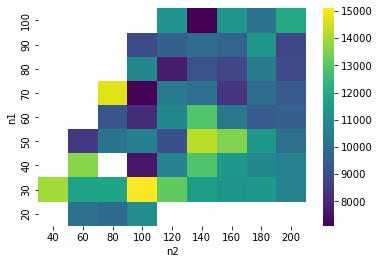

In [33]:
import seaborn as sns


sns.heatmap(hm[::-1], cmap='viridis')

In [34]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

Column(id='5204', ...)

In [35]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [40]:

from backtesting.test import EURUSD, SMA

data = EURUSD.copy()
data

,Open,High,Low,Close,Volume
2017-04-19 09:00:00,1.07160,1.07220,1.07083,1.07219,1413
2017-04-19 10:00:00,1.07214,1.07296,1.07214,1.07260,1241
2017-04-19 11:00:00,1.07256,1.07299,1.07170,1.07192,1025
2017-04-19 12:00:00,1.07195,1.07280,1.07195,1.07202,1460
2017-04-19 13:00:00,1.07200,1.07230,1.07045,1.07050,1554
...,...,...,...,...,...
2018-02-07 11:00:00,1.23390,1.23548,1.23386,1.23501,2203
2018-02-07 12:00:00,1.23501,1.23508,1.23342,1.23422,2325
2018-02-07 13:00:00,1.23422,1.23459,1.23338,1.23372,2824
2018-02-07 14:00:00,1.23374,1.23452,1.23238,1.23426,4065


In [41]:
def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

data = data.dropna().astype(float)

In [42]:
import numpy as np


def get_X(data):
    """Return model design matrix X"""
    return data.filter(like='X').values


def get_y(data):
    """Return dependent variable y"""
    y = data.Close.pct_change(48).shift(-48)  # Returns after roughly two days
    y[y.between(-.004, .004)] = 0             # Devalue returns smaller than 0.4%
    y[y > 0] = 1
    y[y < 0] = -1
    return y


def get_clean_Xy(df):
    """Return (X, y) cleaned of NaN values"""
    X = get_X(df)
    y = get_y(df).values
    isnan = np.isnan(y)
    X = X[~isnan]
    y = y[~isnan]
    return X, y

Classification accuracy:  0.4210960032962505


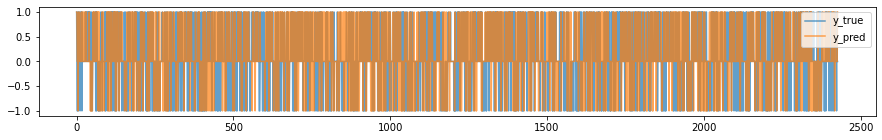

In [43]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [44]:
from backtesting import Backtest, Strategy

N_TRAIN = 400


class MLTrainOnceStrategy(Strategy):
    price_delta = .004  # 0.4%

    def init(self):        
        # Init our model, a kNN classifier
        self.clf = KNeighborsClassifier(7)

        # Train the classifier in advance on the first N_TRAIN examples
        df = self.data.df.iloc[:N_TRAIN]
        X, y = get_clean_Xy(df)
        self.clf.fit(X, y)

        # Plot y for inspection
        self.I(get_y, self.data.df, name='y_true')

        # Prepare empty, all-NaN forecast indicator
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        # Skip the training, in-sample data
        if len(self.data) < N_TRAIN:
            return

        # Proceed only with out-of-sample data. Prepare some variables
        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        # Forecast the next movement
        X = get_X(self.data.df.iloc[-1:])
        forecast = self.clf.predict(X)[0]

        # Update the plotted "forecast" indicator
        self.forecasts[-1] = forecast

        # If our forecast is upwards and we don't already hold a long position
        # place a long order for 20% of available account equity. Vice versa for short.
        # Also set target take-profit and stop-loss prices to be one price_delta
        # away from the current closing price.
        upper, lower = close[-1] * (1 + np.r_[1, -1]*self.price_delta)

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # Additionally, set aggressive stop-loss on trades that have been open 
        # for more than two days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)


bt = Backtest(data, MLTrainOnceStrategy, commission=.0002, margin=.05)
bt.run()

Start                     2017-04-25 12:00:00
End                       2018-02-07 15:00:00
Duration                    288 days 03:00:00
Exposure Time [%]                   79.412365
Equity Final [$]                 14165.286009
Equity Peak [$]                  14979.134698
Return [%]                           41.65286
Buy & Hold Return [%]               12.869869
Return (Ann.) [%]                   42.861028
Volatility (Ann.) [%]               26.903138
Sharpe Ratio                         1.593161
Sortino Ratio                        3.591481
Calmar Ratio                           4.5411
Max. Drawdown [%]                   -9.438468
Avg. Drawdown [%]                   -1.106726
Max. Drawdown Duration       41 days 23:00:00
Avg. Drawdown Duration        2 days 15:00:00
# Trades                                  354
Win Rate [%]                        52.542373
Best Trade [%]                       0.578258
Worst Trade [%]                     -0.519427
Avg. Trade [%]                    

In [45]:
bt.plot()

Row(id='6142', ...)

In [46]:
class MLWalkForwardStrategy(MLTrainOnceStrategy):
    def next(self):
        # Skip the cold start period with too few values available
        if len(self.data) < N_TRAIN:
            return

        # Re-train the model only every 20 iterations.
        # Since 20 << N_TRAIN, we don't lose much in terms of
        # "recent training examples", but the speed-up is significant!
        if len(self.data) % 20:
            return super().next()

        # Retrain on last N_TRAIN values
        df = self.data.df[-N_TRAIN:]
        X, y = get_clean_Xy(df)
        self.clf.fit(X, y)

        # Now that the model is fitted, 
        # proceed the same as in MLTrainOnceStrategy
        super().next()


bt = Backtest(data, MLWalkForwardStrategy, commission=.0002, margin=.05)
bt.run()

Start                     2017-04-25 12:00:00
End                       2018-02-07 15:00:00
Duration                    288 days 03:00:00
Exposure Time [%]                   71.720057
Equity Final [$]                  5885.371145
Equity Peak [$]                  10052.843539
Return [%]                         -41.146289
Buy & Hold Return [%]               12.869869
Return (Ann.) [%]                  -41.902348
Volatility (Ann.) [%]               10.794943
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -41.471113
Avg. Drawdown [%]                  -14.356287
Max. Drawdown Duration      261 days 18:00:00
Avg. Drawdown Duration       88 days 05:00:00
# Trades                                  324
Win Rate [%]                        41.666667
Best Trade [%]                       0.384255
Worst Trade [%]                     -0.506643
Avg. Trade [%]                    

In [47]:
bt.plot()

Row(id='7075', ...)